In [1]:
import pandas as pd


trace = pd.read_csv("acol_trace.txt", sep="\t")

which_variable = "species_alpha"
which_number = which_variable + "_101"

In [2]:
trace

,gamma_1,gamma_2,molecules_mean_log_nu,molecules_var_log_nu,molecules_log_nu_1,molecules_log_nu_2,molecules_log_nu_3,molecules_log_nu_4,molecules_log_nu_5,molecules_log_nu_6,...,species_alpha_130,species_alpha_131,species_alpha_132,species_alpha_133,species_alpha_134,species_alpha_135,species_alpha_136,species_alpha_137,species_alpha_138,species_alpha_139
0,0.001000,0.000000,0.5,0.2,10,10,10,10,10,10,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
1,0.012278,0.182353,0.5,0.2,10,10,10,10,10,10,...,0.554950,0.558420,0.505274,0.716885,0.518527,0.574553,0.511969,0.619854,0.581853,0.433475
2,0.087637,0.298099,0.5,0.2,10,10,10,10,10,10,...,0.910220,0.615995,0.865277,0.731397,0.507034,0.918821,0.582009,0.329803,0.815183,0.767420
3,0.361587,0.280470,0.5,0.2,10,10,10,10,10,10,...,0.864498,0.759689,0.645550,0.767069,0.750063,0.926441,0.278211,0.391719,0.935019,0.761039
4,0.132030,0.610411,0.5,0.2,10,10,10,10,10,10,...,0.980487,0.902531,0.269743,0.809442,0.946463,0.393695,0.270238,0.760384,0.927406,0.613371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,13380.200000,12896.700000,0.5,0.2,10,10,10,10,10,10,...,0.415799,0.546400,0.517944,0.958077,0.900405,0.793701,0.407455,0.596183,0.955749,0.999050
2997,13303.500000,13088.400000,0.5,0.2,10,10,10,10,10,10,...,0.797235,0.654878,0.460333,0.784956,0.548114,0.779773,0.921789,0.548775,0.899053,0.903735
2998,12802.700000,13032.300000,0.5,0.2,10,10,10,10,10,10,...,0.747639,0.743585,0.055168,0.316919,0.633699,0.399999,0.900281,0.812627,0.254448,0.772217
2999,12395.400000,13381.400000,0.5,0.2,10,10,10,10,10,10,...,0.513335,0.900757,0.905281,0.786561,0.342914,0.732882,0.340741,0.141504,0.291932,0.999056


In [3]:
print(trace[which_number].mean())
print(trace[which_number].var())

0.7501589009996666
0.034360141214734595


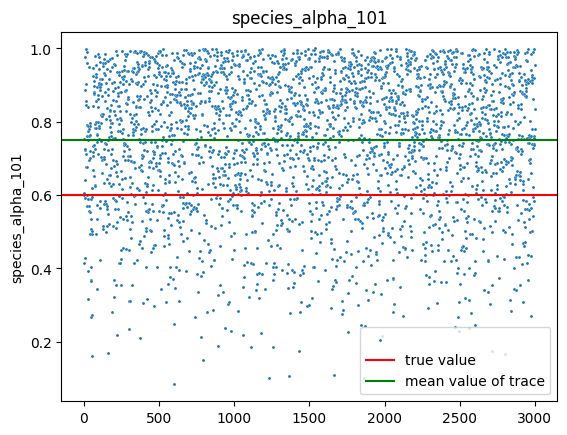

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=trace, y=which_number, x=range(len(trace)), s=5).set_title(
    which_number
)
plt.axhline(y=trace[which_number][0], color="red")
plt.axhline(y=trace[which_number].mean(), color="green")
plt.legend(["", "true value", "mean value of trace"])

In [5]:
species_alpha = [i for i in trace.columns if which_variable in i]

In [6]:
trace[which_number][0]

np.float64(0.6)

(-0.1, 1.1)

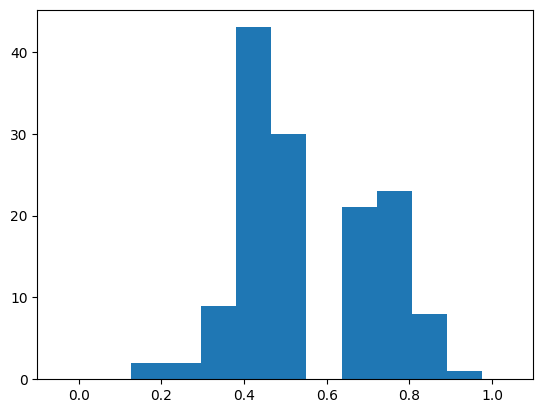

In [7]:
import matplotlib.pyplot as plt

alphas_smaller_than_true_alpha = (trace < trace[which_number][0])[
    species_alpha
].sum() / len(trace)

plt.hist(alphas_smaller_than_true_alpha)
plt.xlim(-0.1, 1.1)

In [8]:
Z_state = pd.read_csv("../acol_simulated_Z_species.txt", sep="\t")

In [9]:
Z_state

,molecules,species,position,Z_state
0,cholesterol,species,0,1
1,sugar,species,1,1
2,leucine,species,2,1
3,morphine,species,3,1
4,fentanyl,species,4,0
...,...,...,...,...
134,leaf_96,species,134,0
135,leaf_97,species,135,0
136,leaf_98,species,136,1
137,leaf_99,species,137,0


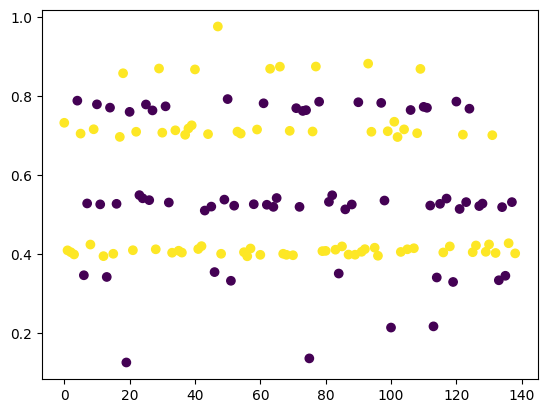

In [10]:
plt.scatter(
    x=range(len(alphas_smaller_than_true_alpha)),
    y=alphas_smaller_than_true_alpha,
    c=Z_state["Z_state"],
)